### Importing libraries

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.datasets.cifar10 import load_data


In [ ]:
# Loading Data

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()

170498071/170498071 [==============================] - 49s 0us/step


### Rescaling the images at a single value cuz in gray scale these are divided into 0-255

In [ ]:
# rescale image
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

### Model implementation

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(32, 32, 3), padding="same", activation="relu", kernel_constraint=MaxNorm(3)),
    Dropout(0.3),
    Conv2D(32, (3,3), padding="same", activation="relu", kernel_constraint=MaxNorm(3)),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation="relu", kernel_constraint=MaxNorm(3)),
    Dropout(0.5),
    Dense(10, activation="sigmoid")
])


In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", 
              metrics="sparse_categorical_accuracy")


In [ ]:
model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=3, batch_size=32)

Epoch 1/3
1563/1563 [==============================] - 199s 127ms/step - loss: 1.5144 - sparse_categorical_accuracy: 0.4538 - val_loss: 1.2389 - val_sparse_categorical_accuracy: 0.5759
Epoch 2/3
1563/1563 [==============================] - 166s 106ms/step - loss: 1.1815 - sparse_categorical_accuracy: 0.5775 - val_loss: 1.0546 - val_sparse_categorical_accuracy: 0.6385
Epoch 3/3
1563/1563 [==============================] - 193s 124ms/step - loss: 1.0761 - sparse_categorical_accuracy: 0.6187 - val_loss: 1.0090 - val_sparse_categorical_accuracy: 0.6410


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

In [ ]:
print(model.layers[0].kernel)

<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
array([[[[-7.23345056e-02,  2.49793120e-02, -1.85521320e-01,
          -5.97872064e-02, -1.27266303e-01, -2.20308140e-01,
          -7.28012174e-02,  2.99575768e-04, -8.24235827e-02,
           1.12061292e-01, -8.37659240e-02,  4.31577228e-02,
          -1.00176513e-01,  4.13929597e-02,  2.40318358e-01,
          -2.22123060e-02, -3.72240506e-02, -9.89720002e-02,
          -9.06498432e-02, -8.19407403e-03,  7.73270652e-02,
          -1.88784420e-01,  3.01984139e-02,  9.12053138e-02,
           2.51978338e-01, -1.57651573e-01,  1.04025498e-01,
           1.53276369e-01, -6.05953895e-02, -1.64510936e-01,
           8.78414605e-04,  1.96112067e-01],
         [-6.32416457e-02, -1.29449308e-01, -3.97157706e-02,
           1.12011999e-01, -1.03683092e-01, -8.99156332e-02,
           1.88457608e-01, -8.32323059e-02, -1.43086463e-01,
           1.18299037e-01, -1.78820699e-01, -2.25859918e-02,
          -7.63545628e-04,  

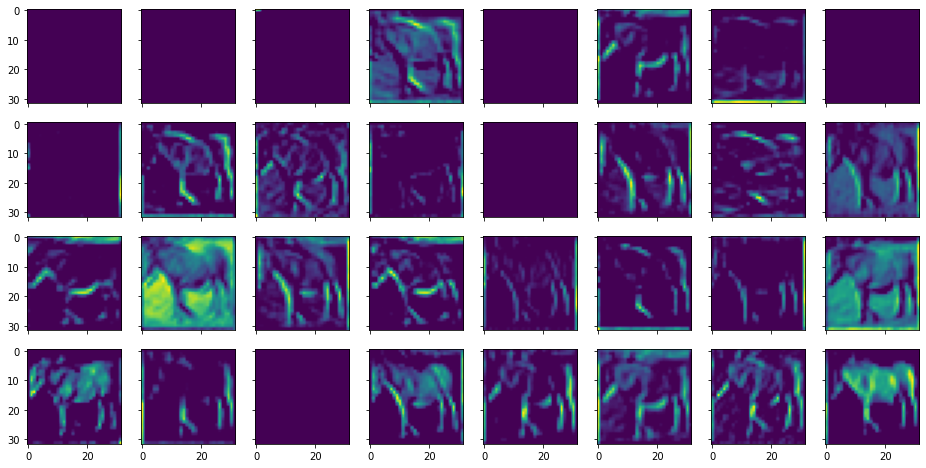

In [ ]:
# Extract output from each layer
extractor = tf.keras.Model(inputs=model.inputs,
                           outputs=[layer.output for layer in model.layers])
features = extractor(np.expand_dims(X_train[7], 0))
 
# Show the 32 feature maps from the first layer
l0_features = features[0].numpy()[0]
 
fig, ax = plt.subplots(4, 8, sharex=True, sharey=True, figsize=(16,8))
for i in range(0, 32):
    row, col = i//8, i%8
    ax[row][col].imshow(l0_features[..., i])
 
plt.show()
